# Primary Forward Modeling Notebook
Goal here is to have some config in the first cell that then lets us generate the figures and data that we need for the remainder of the simulation. Let most of the code live in `gsmt.py`

In [10]:
# User config if I want to be fancy
gsmt = 'GMT'
band = ''

In [4]:
from hcipy import *
import matplotlib.pyplot as plt
import numpy as np
from poke.poke_core import Rayfront
import poke.plotting as plot
import zosapi

In [5]:
# connect to the GMT and run a PRT
zos = zosapi.App() # init connection to make zmx happy
pth = 'C:/Users/UASAL-OPTICS/Desktop/polarization-gsmts-II/raytraces/GMT.zmx'

nrays = 1024
wavelength = 0.656e-6
pupil_radius = 25.448 / 2
max_fov = 1e-6
n_Al = 0.73677 + 1j*5.77450

# surface config
m1 = {'surf':1,'coating':n_Al,'mode':'reflect'}
m2 = {'surf':2,'coating':n_Al,'mode':'reflect'}
m3 = {'surf':5,'coating':n_Al,'mode':'reflect'}

rf = Rayfront(nrays,wavelength,pupil_radius,max_fov,circle=False)
rf.as_polarized([m1,m2,m3])
rf.trace_rayset(pth)

norm fov =  [0. 0.]
base ray shape  (4, 1048576)
tracing with global coordinates
tracing with global coordinates
tracing with global coordinates
1 Raysets traced through 3 surfaces


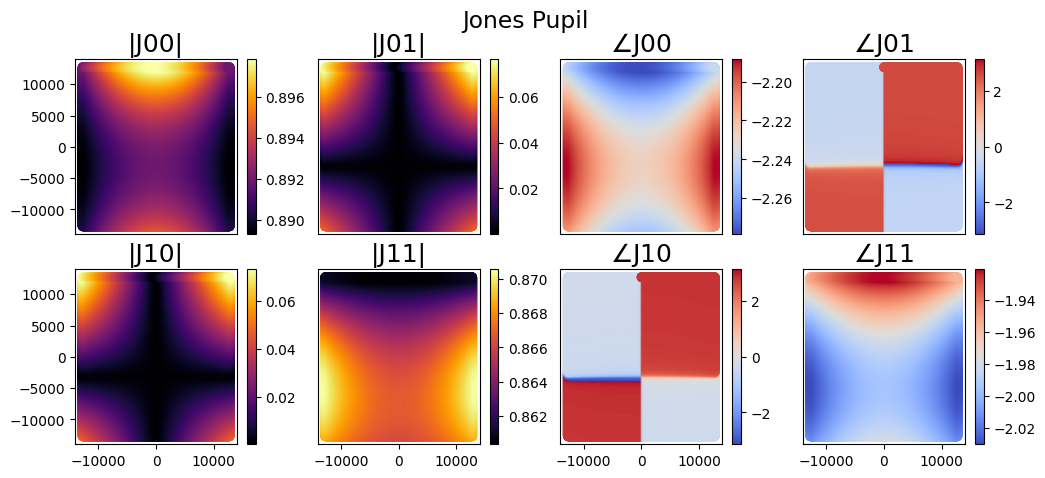

In [6]:
# compute the jones pupil
rf.compute_jones_pupil(aloc=np.array([0.,1.,0.]))
plot.jones_pupil(rf)

In [7]:
from poke.interfaces import rayfront_to_hcipy_wavefront
D_tel = 25.448
F_tel = 207.589
wvl = 0.656e-6
order = 2
npix = 1024
grid = make_pupil_grid(npix,D_tel)

wvfnt = rayfront_to_hcipy_wavefront(rf,npix,grid)

In [22]:
if D_tel != 1:
    normalize_aperture = False
aperture = evaluate_supersampled(make_gmt_aperture(normalized=normalize_aperture,with_spiders=False),grid,1)
focal_grid = make_focal_grid(5,10,spatial_resolution=wvl/D_tel*F_tel)
prop = FraunhoferPropagator(grid,focal_grid,focal_length=F_tel)
wvfnt.electric_field *= aperture
wvfnt.total_power = 1.0
wvfnt.wavelength = wvl
norm = prop(wvfnt).power.max()
coronagraph = PerfectCoronagraph(aperture, order)
wfout = prop(coronagraph(wvfnt))


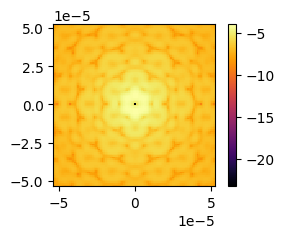

In [24]:
imshow_field(np.log10(wfout.power/norm),cmap='inferno')
plt.colorbar()

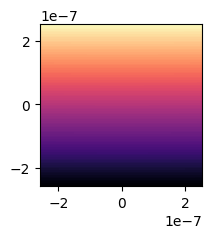

In [32]:
imshow_field(prop(wvfnt).intensity)